In [5]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [9]:
train_df=pd.read_csv("C:/Users/Sridhar Reddy/DSCourse/MachineLearning-4/train.csv")
test_df=pd.read_csv("C:/Users/Sridhar Reddy/DSCourse/MachineLearning-4/test.csv")

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


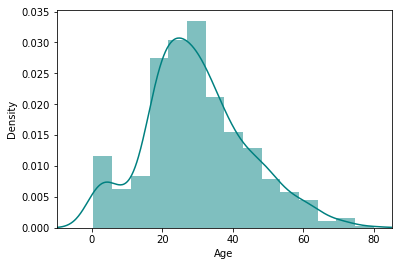

In [13]:
ax=train_df["Age"].hist(bins=15, density=True, stacked=True, color= 'teal', alpha=0.5)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
    

In [14]:
combine=[train_df,test_df] #to make things faster

In [15]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
categorical=train_df.dtypes[train_df.dtypes == 'object'].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
train_df.describe(include=['O'])# only categorical

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Master. Eino Viljami",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [21]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by= 'Survived' , ascending= False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by= 'Survived' , ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by= 'Survived' , ascending= False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [25]:
train_df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by= 'Survived' , ascending= False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


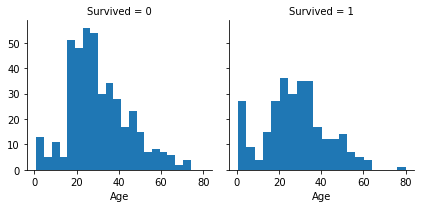

In [40]:
g=sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age',bins=20)

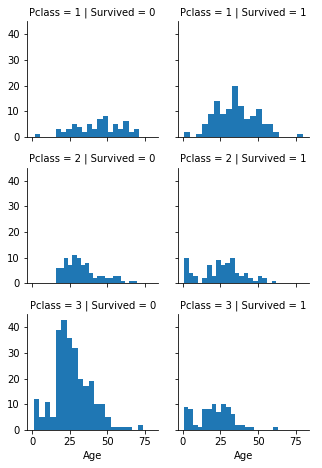

In [32]:
grid=sns.FacetGrid(train_df,col='Survived', row='Pclass',height=2.2, aspect=1)
grid.map(plt.hist, 'Age',bins=20 )
grid.add_legend()

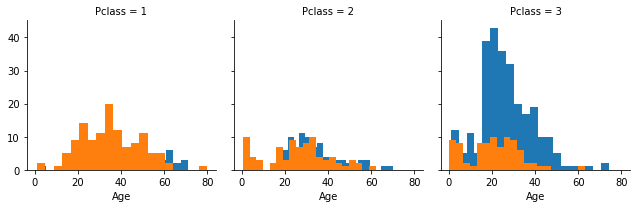

In [35]:
grid=sns.FacetGrid(train_df,col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age',bins=20 )
#pclass3 maximum died

E:\ancnda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
E:\ancnda\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
E:\ancnda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


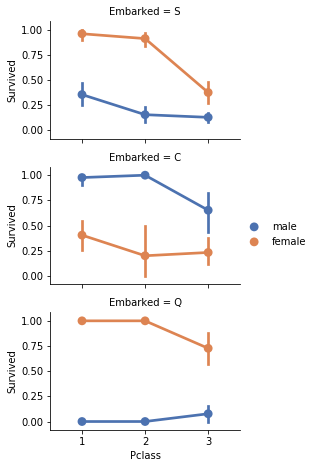

In [39]:
grid=sns.FacetGrid(train_df,row='Embarked',height=2.2,aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep' )
grid.add_legend()


E:\ancnda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


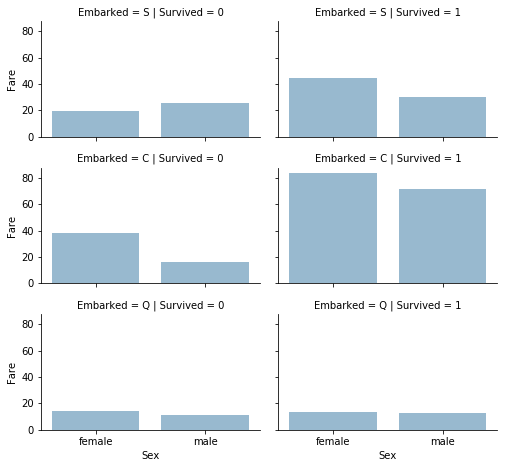

In [46]:
grid=sns.FacetGrid(train_df,col='Survived',row='Embarked',height=2.2,aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=0.5,ci=None ) #finds out the interval
grid.add_legend()

In [47]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)

In [50]:
for dataset in combine:
     dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False) #RegularExpression to find alpha names
pd.crosstab(combine[0]['Title'],combine[0]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [53]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['lady','Countess','Don','Dr','Capt','Rev','Sir','Major','Jonkheer','Rare'])
    dataset['Title']=dataset['Title'].replace('Mile','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme',' Mrs')

In [54]:
pd.crosstab(combine[0]['Title'],combine[0]['Sex'])

Sex,female,male
Title,,
Mrs,1,0
Col,0,2
Lady,1,0
Master,0,40
Miss,183,2
Mlle,2,0
Mr,2,530
Mrs,125,3


In [55]:
combine[0][['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Mrs,1.000000
1,Col,0.500000
2,Lady,1.000000
3,Master,0.575000
4,Miss,0.697297
5,Mlle,1.000000
6,Mr,0.161654
7,Mrs,0.773438


In [56]:
title_mapping={'Mr' :1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
combine[0].head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [ ]:
train_df=combine[0].copy()
test_df=combine[0].copy()